In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

# Linear Regression

In [2]:
#observations for the top 20
laliga_df=pd.read_csv("playerstats.csv",delimiter=",")
minutes_model=laliga_df[["Player","Squad","Min","Age"]]
minutes_model['Age_squared'] = np.power(minutes_model["Age"],2)
minutes_model['Age_cubed'] = np.power(minutes_model["Age"],3)
minutes_model

,Player,Squad,Min,Age,Age_squared,Age_cubed
0,Luis Abram,Granada,560,25.0,625.0,15625.0
1,Marcos Acuña,Sevilla,2260,29.0,841.0,24389.0
2,Martin Agirregabiria,Alavés,1616,25.0,625.0,15625.0
3,Julen Agirrezabala,Athletic Club,360,20.0,400.0,8000.0
4,Sergio Agüero,Barcelona,151,33.0,1089.0,35937.0
...,...,...,...,...,...,...
612,Joseba Zaldúa,Real Sociedad,1172,29.0,841.0,24389.0
613,Oier Zarraga,Athletic Club,1166,22.0,484.0,10648.0
614,Luca Zidane,Rayo Vallecano,645,23.0,529.0,12167.0
615,Igor Zubeldia,Real Sociedad,1648,24.0,576.0,13824.0


## Plotting the data

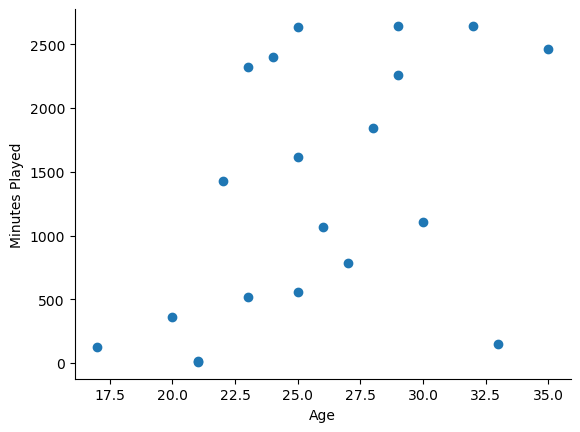

In [3]:
fig, ax = plt.subplots(num=1)
plt.scatter(x="Age",y="Min",data=minutes_model.head(20))
ax.set_xlabel("Age")
ax.set_ylabel("Minutes Played")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## Fitting the line

In [4]:
model_fit = smf.ols(formula='Min ~ Age  ', data=minutes_model.head(20)).fit()
print(model_fit.summary())
b=model_fit.params

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     5.415
Date:                Wed, 25 Jun 2025   Prob (F-statistic):             0.0318
Time:                        00:37:32   Log-Likelihood:                -163.24
No. Observations:                  20   AIC:                             330.5
Df Residuals:                      18   BIC:                             332.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1293.0147   1152.158     -1.122      0.2

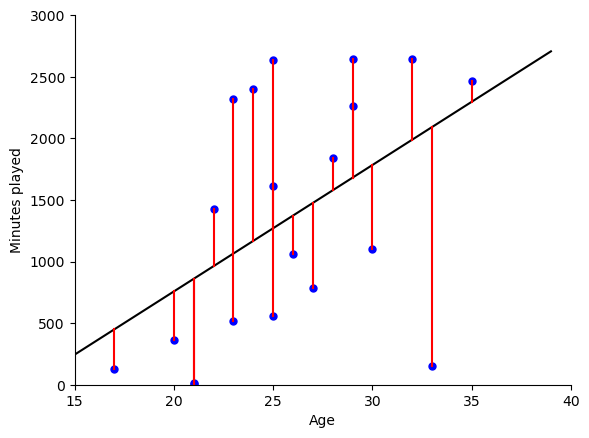

In [5]:
#First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot('Age','Min',data=minutes_model.head(20), linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

#Now create the line through the data
x=np.arange(40,step=1)
y= b[0]+b[1]*x
ax.plot(x, y, color='black')

#Show distances to line for each point
for i,a in enumerate(minutes_model['Age'].head(20)):
    ax.plot([a,a],[minutes_model['Min'].head(20)[i], b[0]+b[1]*a], color='red')
plt.show()

## Including the squared terms

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.559
Date:                Wed, 25 Jun 2025   Prob (F-statistic):             0.0512
Time:                        00:37:32   Log-Likelihood:                -162.38
No. Observations:                  20   AIC:                             330.8
Df Residuals:                      17   BIC:                             333.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8063.5823   5573.188     -1.447      

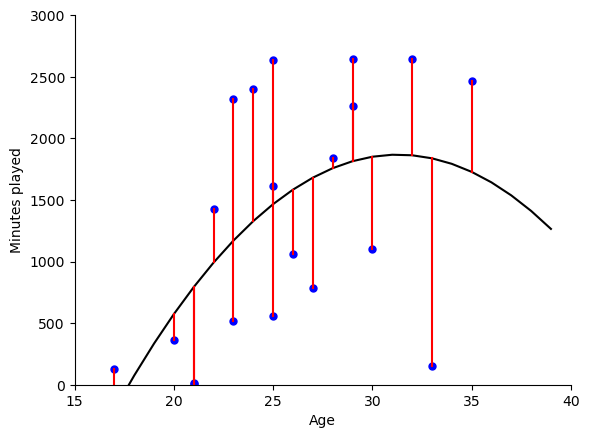

In [6]:
model_fit = smf.ols(formula='Min ~ Age + Age_squared  ', data=minutes_model.head(20)).fit()
print(model_fit.summary())
b=model_fit.params


#First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot('Age','Min',data=minutes_model.head(20), linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

#Now create the line through the data
x=np.arange(40,step=1)
y= b[0]+b[1]*x+b[2]*x*x
ax.plot(x, y, color='black')

#Show distances to line for each point
for i,a in enumerate(minutes_model['Age'].head(20)):
    ax.plot([a,a],[minutes_model['Min'].head(20)[i], b[0]+b[1]*a+b[2]*a*a], color='red')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     51.35
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           2.41e-21
Time:                        00:37:32   Log-Likelihood:                -5057.4
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     613   BIC:                         1.013e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5255.8833    951.226     -5.525      

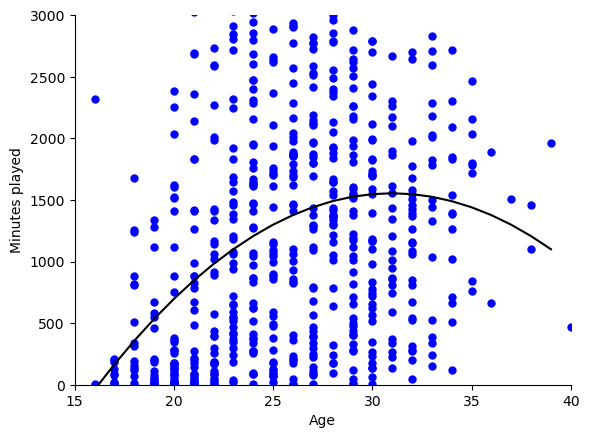

In [7]:
model_fit = smf.ols(formula='Min ~ Age + Age_squared  ', data=minutes_model).fit()
print(model_fit.summary())
b=model_fit.params


#First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot('Age','Min',data=minutes_model, linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

#Now create the line through the data
x=np.arange(40,step=1)
y= b[0]+b[1]*x+b[2]*x*x
ax.plot(x, y, color='black')

#Show distances to line for each point
#for i,a in enumerate(minutes_model['Age'].head(20)):
 #   ax.plot([a,a],[minutes_model['Min'].head(20)[i], b[0]+b[1]*a+b[2]*a*a], color='red')
plt.show()

### Now try with all data points
1. Refit the model with all data points
2. Try adding a cubic term
3. Think about how well the model works. What are the limitations?

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     34.82
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           8.73e-21
Time:                        00:37:33   Log-Likelihood:                -5056.6
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     612   BIC:                         1.014e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.024e+04   4002.240     -2.559      

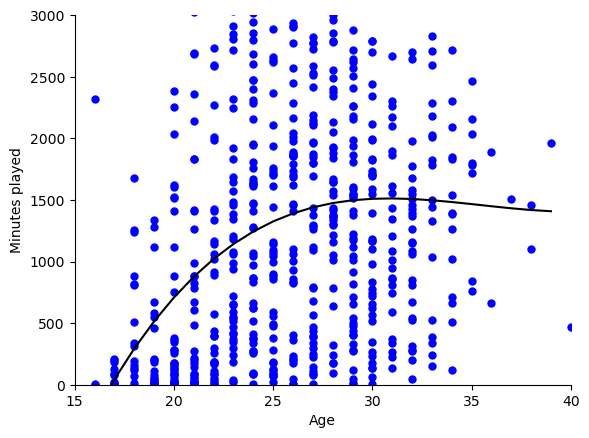

In [8]:
model_fit = smf.ols(formula='Min ~ Age + Age_squared + Age_cubed  ', data=minutes_model).fit()
print(model_fit.summary())
b=model_fit.params


#First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot('Age','Min',data=minutes_model, linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

#Now create the line through the data
x=np.arange(40,step=1)
y= b[0]+b[1]*x+b[2]*x*x+b[3]*x*x*x
ax.plot(x, y, color='black')

#Show distances to line for each point
#for i,a in enumerate(minutes_model['Age'].head(20)):
 #   ax.plot([a,a],[minutes_model['Min'].head(20)[i], b[0]+b[1]*a+b[2]*a*a], color='red')
plt.show()

## Limitations of this model
1. In reality, the number of minutes a player plays tends to reduce as players age. However, this model seems to suggest that the minutes played plateaus after 30 years.

# Fitting an xG model

In [9]:
import soccerdata as sd

[06/25/25 00:37:35] INFO     No custom team name replacements found. You can configure these in       ]8;id=319866;file://c:\Users\elvin\anaconda3\envs\myenv\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=792347;file://c:\Users\elvin\anaconda3\envs\myenv\lib\site-packages\soccerdata\_config.py#91\91]8;;\
                             C:\Users\elvin\soccerdata\config\teamname_replacements.json.                          

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=457866;file://c:\Users\elvin\anaconda3\envs\myenv\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=542000;file://c:\Users\elvin\anaconda3\envs\myenv\lib\site-packages\soccerdata\_config.py#197\197]8;;\
                             C:\Users\elvin\soccerdata\config\league_dict.json.                                    

In [10]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import pathlib
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [83]:
train = pd.read_json(r"C:\Users\elvin\Documents\Soccermatics\Wyscout\events\events_Spain.json")

In [12]:
train.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,Pass,682,1H,2.994582,85,180864419
1,8,Simple pass,[{'id': 1801}],274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,Pass,682,1H,3.137020,85,180864418
2,8,Simple pass,[{'id': 1801}],364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548,Pass,682,1H,6.709668,85,180864420
3,8,Simple pass,[{'id': 1801}],3534,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",2565548,Pass,682,1H,8.805497,85,180864421
4,8,Simple pass,[{'id': 1801}],3695,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",2565548,Pass,682,1H,14.047492,85,180864422


In [13]:
print(f"unique_eventName: {train.eventName.unique()}")
print()
print(f"unique_subeventName: {train.subEventName.unique()}")


unique_eventName: ['Pass' 'Duel' 'Others on the ball' 'Shot' 'Save attempt' 'Interruption'
 'Free Kick' 'Foul' 'Offside' 'Goalkeeper leaving line']

unique_subeventName: ['Simple pass' 'Smart pass' 'Cross' 'Ground defending duel' 'Acceleration'
 'Ground attacking duel' 'Shot' 'Reflexes' 'Touch' 'Ball out of the field'
 'Corner' 'Goal kick' 'Throw in' 'High pass' 'Head pass' 'Launch'
 'Ground loose ball duel' 'Foul' 'Free Kick' 'Clearance' 'Air duel' ''
 'Free kick cross' 'Hand foul' 'Save attempt' 'Hand pass'
 'Goalkeeper leaving line' 'Penalty' 'Free kick shot' 'Late card foul'
 'Time lost foul' 'Whistle' 'Simulation' 'Protest' 'Out of game foul'
 'Violent Foul']


In [14]:
shots = train.loc[train['subEventName'] == 'Shot']
#get shot coordinates as separate columns
#these calculations are to transform the coordinates of a shot to 105x68 pitch since wyscout stores its x and y values as a percentage
shots["X"] = shots.positions.apply(lambda cell: (100 - cell[0]['x']) * 105/100)
shots["Y"] = shots.positions.apply(lambda cell: cell[0]['y'] * 68/100)
#this measures the distance of the point from which the shot was taken to the horizontal line through the center of the field
shots["C"] = shots.positions.apply(lambda cell: abs(cell[0]['y'] - 50) * 68/100)
#we have "X" ranging from 0 to 105, "Y" from 0 to 68 and "C" from 0 to 34


#calculating the distance from goal and the angle of the shot to both goal posts
shots['Distance'] = np.sqrt(shots["X"]**2+shots['C']**2)
shots['Angle'] = np.where(np.arctan(7.32 * shots["X"] /(shots['X']**2 + shots['C']**2 - (7.32/2)**2))>0,
                          np.arctan(7.32 * shots['X'] /(shots['X']**2 + shots['C']**2 - (7.32/2)**2)),
                          np.arctan(7.32 * shots['X'] /(shots['X']**2 + shots['C']**2 - (7.32/2)**2)) + np.pi)

#identifying the goals in the dataset
shots["Goal"] = shots.tags.apply (lambda x: 1 if {'id':101} in x else 0).astype(object)

## Plotting shot location

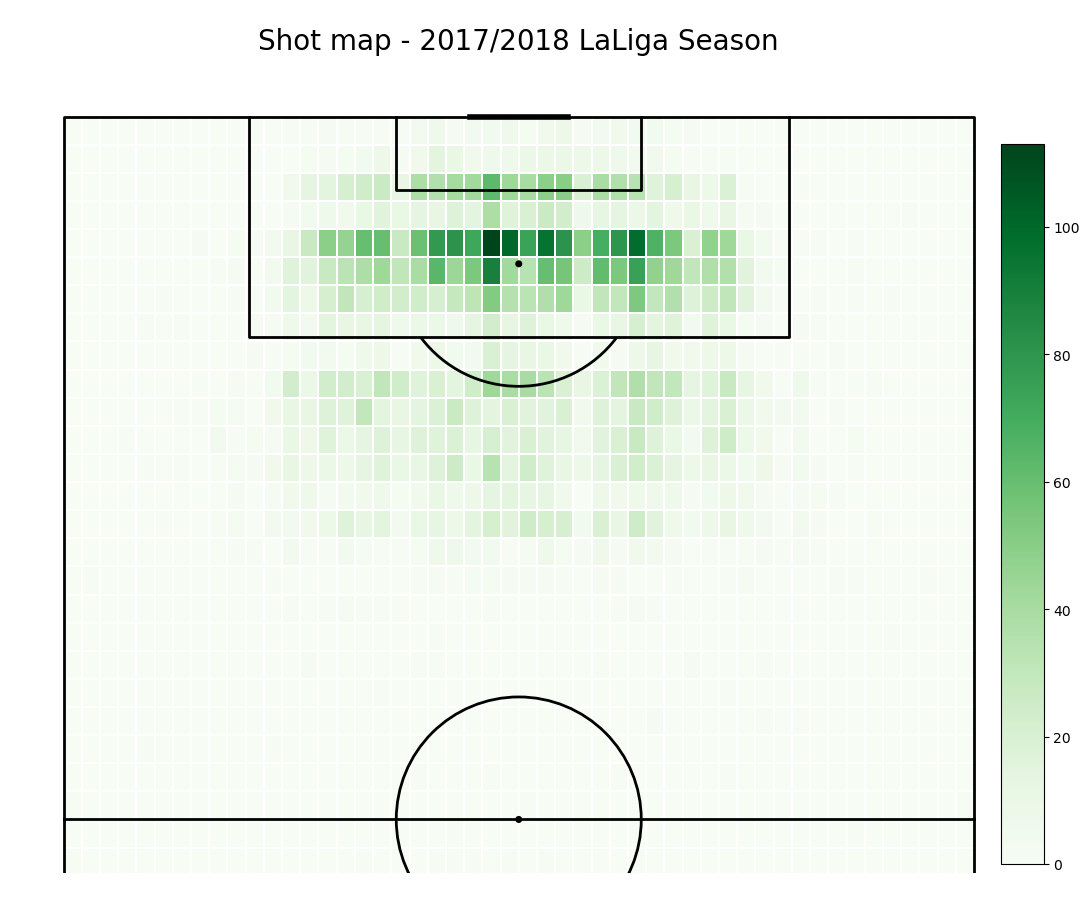

In [15]:
pitch = VerticalPitch(line_color='black',half=True,pitch_type='custom',pitch_length=105,pitch_width=68, line_zorder=2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06,axis=False,
                     endnote_height=0.04,title_space=0,endnote_space=0)


bin_statistic_shots = pitch.bin_statistic(105 - shots.X,shots.Y,bins=50)
#creating the heatmap
pcm = pitch.heatmap(bin_statistic_shots,ax=ax['pitch'],cmap='Greens',edgecolor='white',linewidth=0.01)

ax_cbar = fig.add_axes((0.95,0.05,0.04,0.8))
cbar = plt.colorbar(pcm,cax=ax_cbar)
fig.suptitle('Shot map - 2017/2018 LaLiga Season', fontsize = 20)
plt.show()

## Plotting goal location

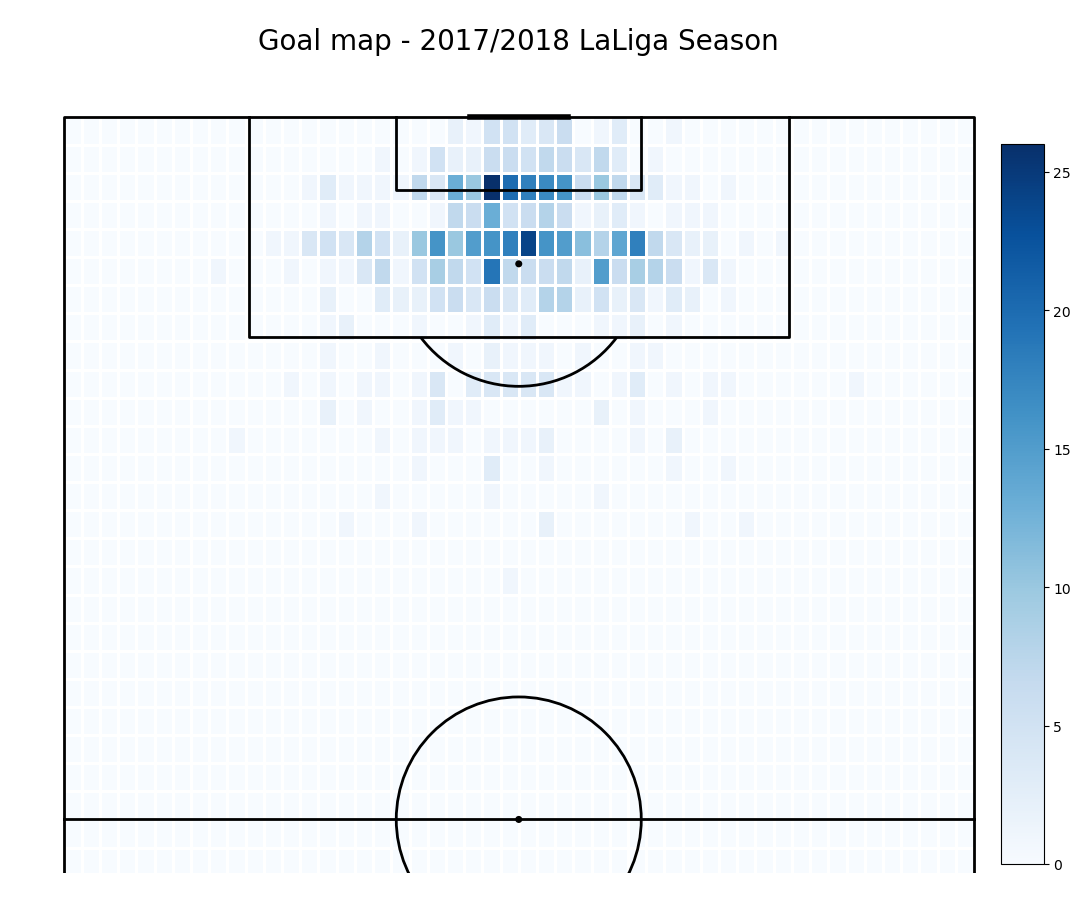

In [16]:
goals = shots[shots['Goal']==1]

pitch = VerticalPitch(line_color='black',half=True,pitch_type='custom',pitch_length=105,pitch_width=68,line_zorder=2)
fig, ax = pitch.grid(grid_height=0.9,title_height=0.06,axis=False,
                     endnote_height=0.04,title_space=0,endnote_space=0)

#calculating the number of goals in each bin
bin_statistic_goals = pitch.bin_statistic(105-goals.X, goals.Y, bins=50)
pcm = pitch.heatmap(bin_statistic_goals, ax = ax['pitch'],cmap='Blues',edgecolor='white')

ax_cbar = fig.add_axes((0.95,0.05,0.04,0.8))
cbar = plt.colorbar(pcm,cax=ax_cbar)
fig.suptitle('Goal map - 2017/2018 LaLiga Season',fontsize = 20)
plt.show()

## Plotting the probability of scoring a goal given the location

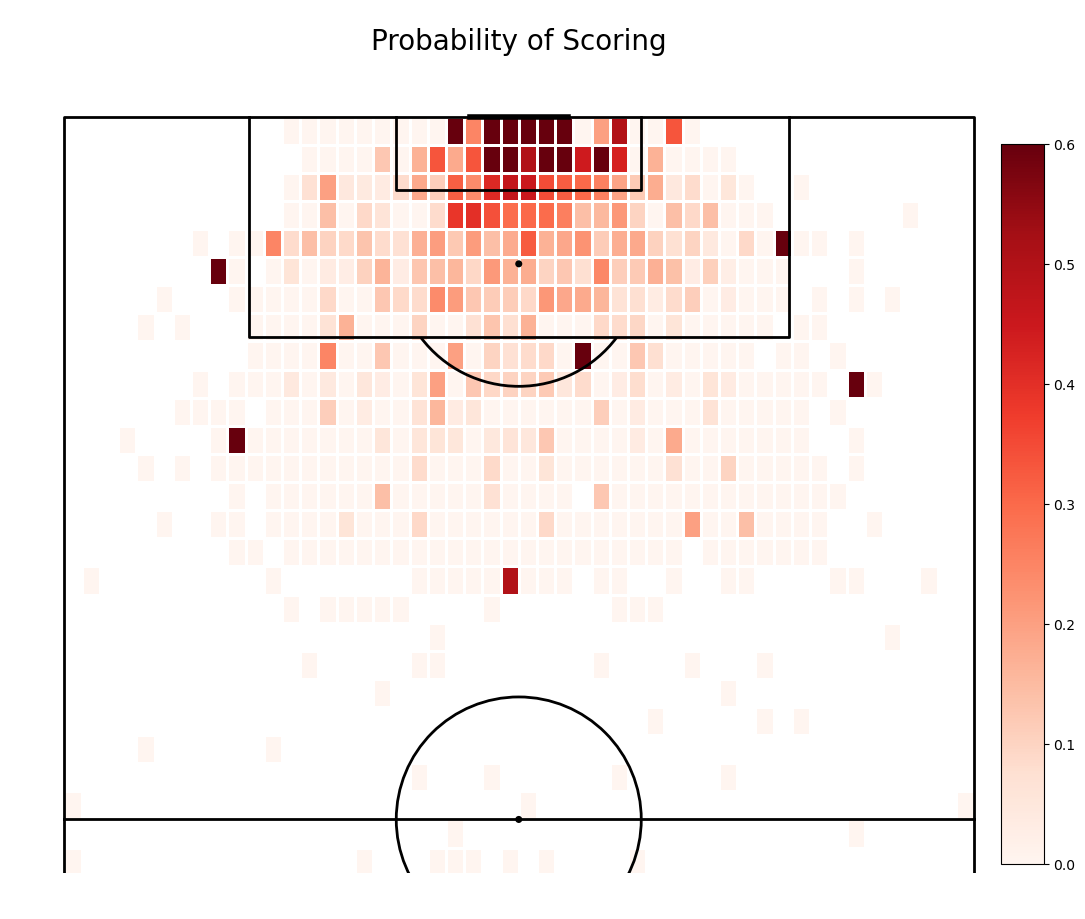

In [17]:
pitch = VerticalPitch(line_color='black',half=True,pitch_type='custom',pitch_length=105,pitch_width=68,line_zorder=2)
fig, ax = pitch.grid(grid_height=0.9,title_height=0.06,axis=False,
                     endnote_height=0.04,title_space=0,endnote_space=0)
bin_statistic = pitch.bin_statistic(105 - shots.X, shots.Y, bins=50)

#normaizing by dividing the number of goals at each area of the pitch by the number of shots taken at that same area
bin_statistic['statistic'] = bin_statistic_goals['statistic']/bin_statistic['statistic']

pcm = pitch.heatmap(bin_statistic, ax = ax['pitch'],cmap='Reds',edgecolor='white',vmin=0,vmax=0.6)

ax_cbar = fig.add_axes((0.95,0.05,0.04,0.8))
cbar = plt.colorbar(pcm,cax=ax_cbar)
fig.suptitle('Probability of Scoring',fontsize = 20)
plt.show()

## Plotting a Logistic Curve

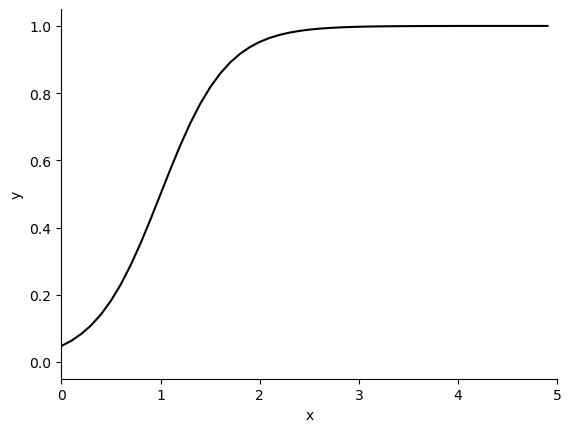

In [18]:
b = [3,-3]
x= np.arange(5, step=0.1)
y = 1/(1+np.exp(b[0]+b[1]*x))
fig, ax = plt.subplots()
plt.ylim((-0.05,1.05))
plt.xlim((0,5))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.plot(x,y, linestyle='solid', color='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## Investigating the relationship between goals and angle

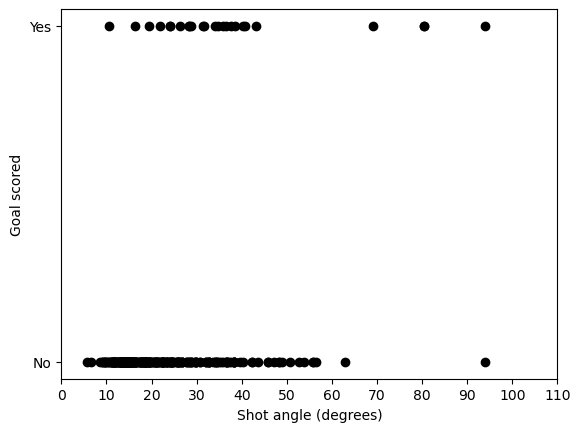

In [19]:
#We first plot if a goal was scored given the angle
# first 300 shots
shots_300 = shots.iloc[:300]
#plot the first 300 shot goal angles
fig, ax = plt.subplots()
#first convert angle to degrees then plot the values
ax.plot(shots_300['Angle']*180/np.pi,shots_300['Goal'],linestyle='none',marker='.',markersize=12,color='black')

ax.set_ylabel('Goal scored')
ax.set_xlabel('Shot angle (degrees)')
plt.ylim((-0.05,1.05))
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
ax.set_xticks(np.arange(0,120,10))
plt.show()

## Investigating the relationship between probablity of scoring goals and angle

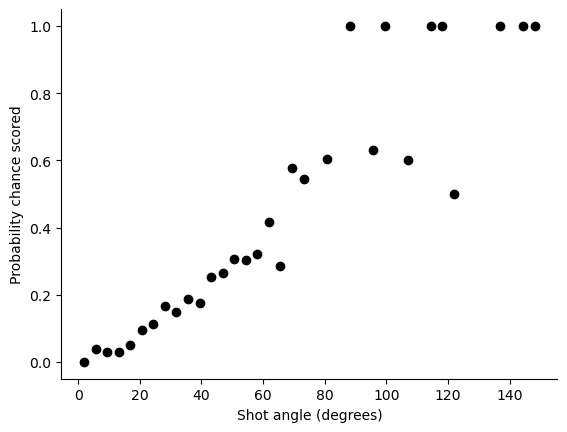

In [20]:
#counts the number of shots split into 40 angle bins
shotcount_dist = np.histogram(shots['Angle']*180/np.pi, bins=40, range=[0,150])
#number of goals split into 40 angle bins
goalcount_dist = np.histogram(goals['Angle']*180/np.pi, bins=40, range=[0,150])
np.seterr(divide='ignore',invalid='ignore')

# calculating the probability of scoring a goal
prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])
angle = shotcount_dist[1]
#gets the midpoint of every angle bin
midangle = (angle[:-1] + angle[1:])/2


fig,ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker='.',markersize=12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel('Shot angle (degrees)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## Fitting logistic regression with random coefficients

We first fit our data to a logistic regression curve using random coefficients (3,-3). This will most likely not be the best parameters

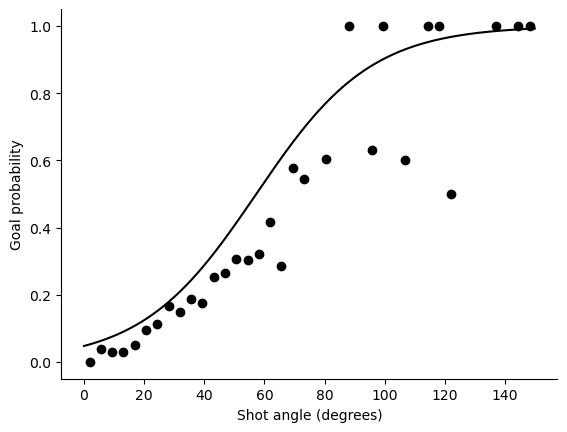

In [21]:
fig, ax = plt.subplots()
b = [3, -3]
x = np.arange(150, step=0.1)
y = 1/(1+np.exp(b[0]+b[1]*x*np.pi/180))

#plot points
ax.plot(midangle,prob_goal,linestyle='none',marker='.',markersize=12,color='black')
#plot log curve
ax.plot(x,y,linestyle='solid',color='black')
plt.xlabel("Shot angle (degrees)")
plt.ylabel("Goal probability")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## Calculating the log-likelihood

In order to get the best parameters for the model, we first have to maximize the log-likelihood

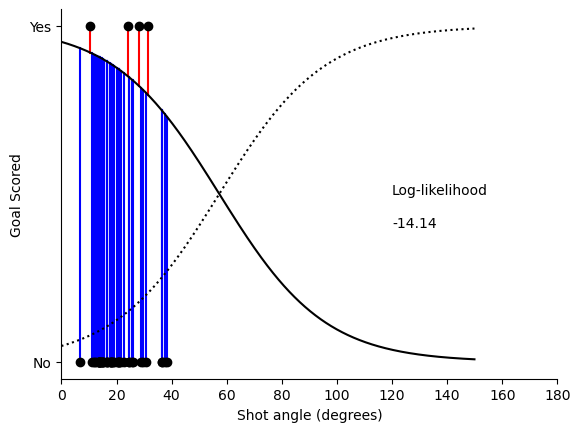

In [22]:
xG = 1/(1+np.exp(b[0]+b[1]*shots['Angle']))
shots = shots.assign(xG = xG)
shots_50 = shots.iloc[:50]
fig, ax = plt.subplots()


ax.plot(shots_50['Angle']*180/np.pi,shots_50['Goal'],linestyle='none',marker='.',markersize=12,color='black')

#still using the initial log curve parameters
ax.plot(x, y, linestyle=':',color='black',zorder=2)
ax.plot(x, 1-y, linestyle='solid',color='black',zorder=2)

#calculate the log likelihood
llh = 0
for item,shot in shots_50.iterrows():
    ang = shot['Angle']*180/np.pi
    if shot['Goal']==1:
        llh = llh + np.log(shot['xG'])
        ax.plot([ang,ang],[shot['Goal'],1-shot['xG']],color='red',zorder=1)
    else:
        llh = llh + np.log(1 - shot['xG'])
        ax.plot([ang,ang],[shot['Goal'],1-shot['xG']],color='blue',zorder=1)

ax.set_ylabel("Goal Scored")
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
plt.xlim((0,180))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.text(120,0.5,'Log-likelihood')
plt.text(120,0.4,str(llh)[:6])
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
plt.show()

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                 7979
Model:                                GLM   Df Residuals:                     7977
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -2447.2
Date:                    Wed, 25 Jun 2025   Deviance:                       4894.4
Time:                            00:37:51   Pearson chi2:                 7.99e+03
No. Iterations:                         6   Pseudo R-squ. (CS):            0.07957
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

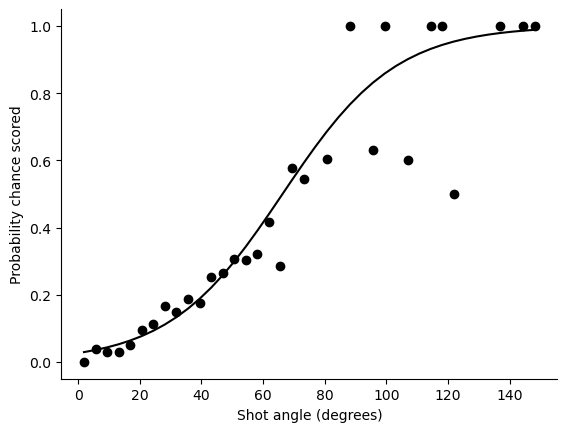

In [23]:
#fitting the log regression and finding the best parameters

#creating a log regression model
formula = "Goal ~ Angle"
test_model = smf.glm(formula=formula, data=shots, family = sm.families.Binomial()).fit()
print(test_model.summary())

b = test_model.params
xGprob = 1/(1+np.exp(b[0]+b[1]*midangle*np.pi/180))

fig, ax =plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none',marker='.',markersize=12, color='black')
ax.plot(midangle,xGprob,linestyle='solid',color='black')

ax.set_ylabel("Probability chance scored")
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Investigating the relationship btn probability of scoring goals and the distance to the goal

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                 7979
Model:                                GLM   Df Residuals:                     7977
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -2421.6
Date:                    Wed, 25 Jun 2025   Deviance:                       4843.2
Time:                            00:37:52   Pearson chi2:                 7.19e+06
No. Iterations:                         7   Pseudo R-squ. (CS):            0.08546
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

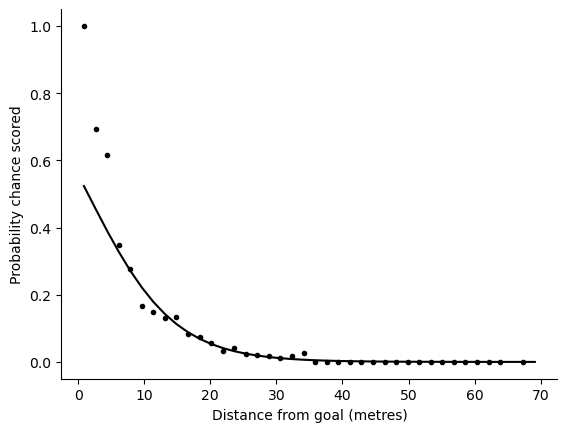

In [24]:
#number of shots
shotcount_dist = np.histogram(shots['Distance'],bins=40,range=[0,70])
#number of goals
goalcount_dist = np.histogram(goals['Distance'],bins=40,range=[0,70])
#empirical probability of scoring
prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])
distance = shotcount_dist[1]
middistance = (distance[:-1] + distance[1:])/2

#plotting the figure
fig, ax = plt.subplots()
ax.plot(middistance, prob_goal, linestyle='none',marker=".",color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel('Distance from goal (metres)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#make single variable model of distance
test_model = smf.glm(formula="Goal ~ Distance", data=shots,
                     family=sm.families.Binomial()).fit()

print(test_model.summary())
b = test_model.params
#calculating xG
xGprob = 1/(1+np.exp(b[0]+b[1]*middistance))
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()


                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                 7979
Model:                                GLM   Df Residuals:                     7976
Model Family:                    Binomial   Df Model:                            2
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -2398.9
Date:                    Wed, 25 Jun 2025   Deviance:                       4797.8
Time:                            00:37:52   Pearson chi2:                 8.12e+03
No. Iterations:                         6   Pseudo R-squ. (CS):            0.09065
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

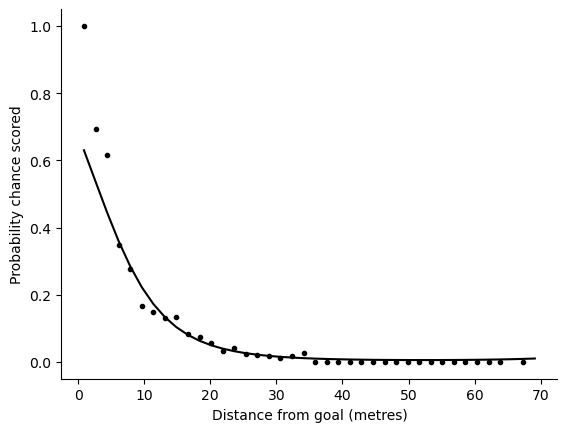

In [25]:
#Adding squared distance to the model to see if we could make the model perform better
shots['D2'] = shots['Distance']**2
formula = 'Goal ~ Distance + D2'
#adding it to the model
test_model = smf.glm(formula=formula, data=shots,
                     family = sm.families.Binomial()).fit()

#printing the model summary
print(test_model.summary())
b = test_model.params

#calculate xG
xGprob = 1/(1+np.exp(b[0]+b[1]*middistance+b[2]*pow(middistance,2)))
fig, ax = plt.subplots()
ax.plot(middistance, prob_goal, linestyle='none', marker ='.',color='black')

ax.set_ylabel('Probability chance scored')
ax.set_xlabel('Distance from goal (metres)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()

## Adding extra variables

                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                 7979
Model:                                GLM   Df Residuals:                     7971
Model Family:                    Binomial   Df Model:                            7
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -2385.0
Date:                    Wed, 25 Jun 2025   Deviance:                       4769.9
Time:                            04:47:25   Pearson chi2:                 7.78e+03
No. Iterations:                         7   Pseudo R-squ. (CS):            0.09382
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

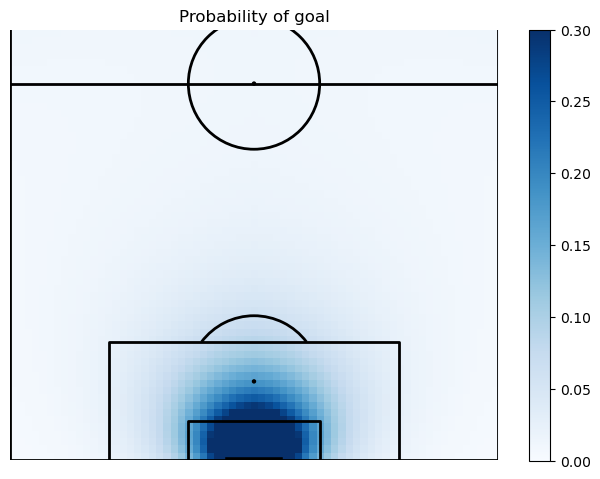

In [ ]:
#creating extra variables to add to the model
shots['X2'] = shots['X']**2
shots['C2'] = shots['C']**2
shots['AX'] = shots['Angle']*shots['X']

formula = 'Goal ~ Angle + Distance + X + C + X2 + C2 + AX'

#training the xG model with the formula above
test_model = smf.glm(formula=formula, data=shots,
                     family=sm.families.Binomial()).fit()

print(test_model.summary())

#gives the input coefficients
b= test_model.params


model_variables = []
for var in formula.split():
    if var not in ['Goal',"+","~"]:
        model_variables.append(var)

#using the log model to compute xG for any given shot
def calculate_xG(sh):
    bnaught = b[0]
    for i, v in enumerate(model_variables):
        bnaught = bnaught+b[i+1]*sh[v]
    xG = 1/(1+np.exp(bnaught))
    return xG

#add xG to the dataframe    
xG = shots.apply(calculate_xG, axis=1)
shots = shots.assign(xG=xG)

#create a 2D map of xG
#returns an array of 0s with a 68x68 shape. This is to account for the full width of the pitch and a little past the halfway line
pgoal_2d = np.zeros((68,68))
#creates a dictionary which has inputs for every shot taken in the 68 by 68 grid
for x in range(68):
    for y in range(68):
        sh=dict()
        a = np.arctan(7.32 * x/(x**2 + abs(y-68/2)**2 - (7.32/2)**2))
        if a<0:
            a = np.pi + a
        sh['Angle'] = a
        sh['Distance'] = np.sqrt(x**2 + abs(y-68/2)**2)
        sh['D2'] = x**2 + pow(abs(y-68/2),2)
        sh['X'] = x
        sh['AX'] = x*a
        sh['X2'] = pow(x,2)
        sh['C'] = abs(y-68/2)
        sh['C2'] = pow((y-68/2),2)

        pgoal_2d[x,y] = calculate_xG(sh)#puts the calculated xG values into the 68 by 68 grid

#plot pitch
pitch = VerticalPitch(line_color='black',half=True,pitch_type='custom',pitch_length=105,
                      pitch_width=68,line_zorder=2)
fig, ax = pitch.draw()
#plotting the probability
pos = ax.imshow(pgoal_2d, extent=[-1,68,68,-1], aspect='auto',
                cmap = plt.cm.Blues,vmin=0,vmax=0.3,zorder=1)
fig.colorbar(pos, ax=ax)

ax.set_title('Probability of goal')
plt.xlim((0,68))
plt.ylim((0,60))
plt.gca().set_aspect('equal',adjustable='box')
plt.show()

## Testing model fit

Mcfaddens Rsquared 0.14148519829123363


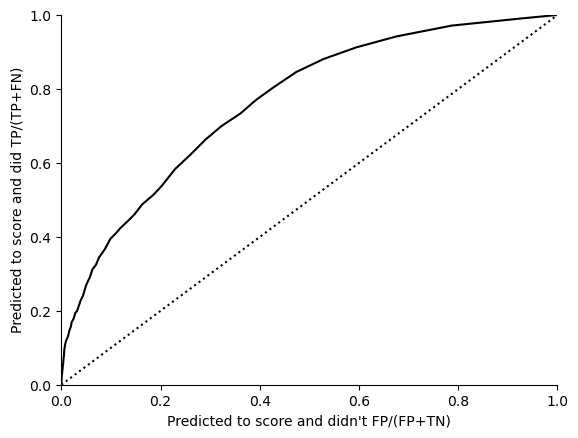

In [27]:
# Mcfaddens Rsquared for Logistic Regression
null_model = smf.glm(formula='Goal ~ 1',data=shots,
                     family=sm.families.Binomial()).fit()
print("Mcfaddens Rsquared", 1-test_model.llf/null_model.llf)

#ROC curve
numobs = 100
TP = np.zeros(numobs)
FP = np.zeros(numobs)
TN = np.zeros(numobs)
FN = np.zeros(numobs)

for i, threshold in enumerate(np.arange(0,1,1/numobs)):
    for j, shot in shots.iterrows():
        if (shot['Goal']==1):
            if (shot['xG']>threshold):
                TP[i] = TP[i]+1
            else:
                FN[i] = FN[i] + 1
        if (shot['Goal']==0):
            if shot['xG']>threshold:
                FP[i] = FP[i] + 1
            else:
                TN[i] = TN[i] + 1

fig,ax = plt.subplots()
ax.plot(FP / (FP + TN), TP / (TP + FN), color='black')
ax.plot([0, 1], [0, 1], linestyle='dotted', color='black')
ax.set_ylabel("Predicted to score and did TP/(TP+FN)")
ax.set_xlabel("Predicted to score and didn't FP/(FP+TN)")
plt.ylim((0.00,1.00))
plt.xlim((0.00,1.00))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Challenge
1. Create different models for headers and non-headers (as suggested in Measuring the Effectiveness of Playing Strategies at Soccer, Pollard (1997))!
2. Assign to penalties xG = 0.8!
3. Find out which player had the highest xG in 2017/18 Premier League season!

In [93]:
c_df = train[train['subEventName']=='Shot']
c_df["X"] = c_df.positions.apply(lambda cell: (100 - cell[0]['x']) * 105/100)
c_df["Y"] = c_df.positions.apply(lambda cell: cell[0]['y'] * 68/100)
c_df["C"] = c_df.positions.apply(lambda cell: abs(cell[0]['y'] - 50) * 68/100)
c_df["Distance"] = np.sqrt(c_df["X"]**2 + c_df["C"]**2)
c_df["Angle"] = np.where(np.arctan(7.32 * c_df["X"] / (c_df["X"]**2 + c_df["C"]**2 - (7.32/2)**2)) > 0,
                            np.arctan(7.32 * c_df["X"] /(c_df["X"]**2 + c_df["C"]**2 - (7.32/2)**2)), 
                            np.arctan(7.32 * c_df["X"] /(c_df["X"]**2 + c_df["C"]**2 - (7.32/2)**2)) + np.pi)

c_df['Header'] = c_df.tags.apply(lambda x: 1 if {'id':403} in x else 0).astype(object)
c_df['Goal'] = c_df.tags.apply(lambda x: 1 if {'id':101} in x else 0).astype(object)


In [94]:
c_df=c_df[['subEventName', 'playerId', 'matchId', 'eventName', 
       'X', 'Y', 'C', 'Distance', 'Angle', 'Header', 'Goal']]

In [99]:
headers_df = c_df[c_df['Header']==1]
headers_df = headers_df.drop(columns='Header')

non_headers_df = c_df[c_df['Header']==0]
non_headers_df = non_headers_df.drop(columns='Header')

### Headers model

In [253]:
headers_df['X2'] = headers_df['X']**2
headers_df['C2'] = headers_df['C']**2
headers_df['AX'] = headers_df['Angle']*headers_df['X']
headers_df['AC'] = headers_df['Angle']*headers_df['C']
headers_df['AD'] = headers_df['Angle']*headers_df['Distance']
headers_df['Angle2'] = headers_df['Angle']**2
headers_df['D2'] = headers_df['Distance']**2


model_variables = ['Angle','Distance','X','C','AX','X2','AC','AD']
model = ''
for v in model_variables[:-1]:
    model = model + v + ' + '
model = model + model_variables[-1]

header_model = smf.glm(formula="Goal ~ "+ model, data=headers_df,
                       family = sm.families.Binomial()).fit()

print(header_model.summary())
b = header_model.params

def calculate_xG(shot):
    bsum = b[0]
    for i,v in enumerate(model_variables):
        bsum = bsum + b[i+1]*shot[v]
    xG = 1 /(1 + np.exp(bsum))
    return xG

xG = headers_df.apply(calculate_xG,axis=1)
headers_df = headers_df.assign(xG=xG)


                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                 1371
Model:                                GLM   Df Residuals:                     1362
Model Family:                    Binomial   Df Model:                            8
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -480.13
Date:                    Wed, 25 Jun 2025   Deviance:                       960.25
Time:                            22:55:42   Pearson chi2:                 1.38e+03
No. Iterations:                         8   Pseudo R-squ. (CS):            0.06922
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

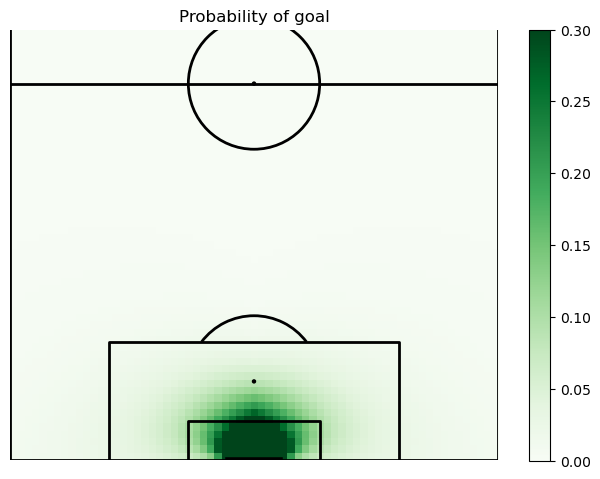

In [254]:
pgoal_2d=np.zeros((68,68))
for x in range(68):
    for y in range(68):
        shot=dict()
        a = np.arctan(7.32 *x /(x**2 + abs(y-68/2)**2 - (7.32/2)**2))
        if a<0:
            a = np.pi + a
        shot['Angle'] = a
        shot['Distance'] = np.sqrt(x**2 + abs(y-68/2)**2)
        shot['D2'] = x**2 + abs(y-68/2)**2
        shot['X'] = x
        shot['AX'] = x*a
        shot['X2'] = x**2
        shot['C'] = abs(y-68/2)
        shot['C2'] = (y-68/2)**2
        shot['Angle2'] = a**2
        shot['AC'] = a*abs(y-68/2)
        shot['AD'] = a * np.sqrt(x**2 + abs(y-68/2)**2)

        pgoal_2d[x,y] =  calculate_xG(shot)

#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.draw()
#plot probability
pos = ax.imshow(pgoal_2d, extent=[-1,68,68,-1], aspect='auto',cmap=plt.cm.Greens,vmin=0, vmax=0.3, zorder = 1)
fig.colorbar(pos, ax=ax)
#make legend
ax.set_title('Probability of goal')
plt.xlim((0,68))
plt.ylim((0,60))
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Non-header model

In [203]:
#adding extra variables
non_headers_df['X2'] = non_headers_df['X']**2
non_headers_df['C2'] = non_headers_df['C']**2
non_headers_df['AX'] = non_headers_df['Angle']*non_headers_df['X']
non_headers_df['AC'] = non_headers_df['Angle']*non_headers_df['C']
non_headers_df['AD'] = non_headers_df['Angle']*non_headers_df['Distance']
non_headers_df['Angle2'] = non_headers_df['Angle']**2
non_headers_df['D2'] = non_headers_df['Distance']**2

formula = "Goal ~ Angle2 + Distance + X"

non_header_model = smf.glm(formula=formula,data=non_headers_df,
                           family = sm.families.Binomial()).fit()

print(non_header_model.summary())
b = non_header_model.params

#calculating xG
mv = []
for item in formula.split():
    if item not in ['Goal','~','+']:
        mv.append(item)


def foot_shot_xG(shot):
    bsum = b[0]
    for i,v in enumerate(mv):
        bsum = bsum + b[i+1]*shot[v]
    fs_xG = 1 / (1+np.exp(bsum))
    return fs_xG

xG = non_headers_df.apply(foot_shot_xG,axis=1)
non_headers_df = non_headers_df.assign(xG=xG)


                   Generalized Linear Model Regression Results                    
Dep. Variable:     ['Goal[0]', 'Goal[1]']   No. Observations:                 6608
Model:                                GLM   Df Residuals:                     6604
Model Family:                    Binomial   Df Model:                            3
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -1859.6
Date:                    Wed, 25 Jun 2025   Deviance:                       3719.1
Time:                            22:10:27   Pearson chi2:                 1.65e+06
No. Iterations:                         7   Pseudo R-squ. (CS):             0.1103
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

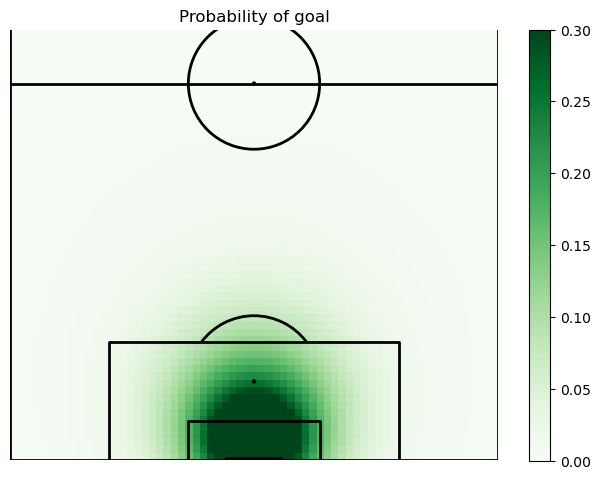

In [230]:
pgoal_2d=np.zeros((68,68))
for x in range(68):
    for y in range(68):
        shot=dict()
        a = np.arctan(7.32 *x /(x**2 + abs(y-68/2)**2 - (7.32/2)**2))
        if a<0:
            a = np.pi + a
        shot['Angle'] = a
        shot['Distance'] = np.sqrt(x**2 + abs(y-68/2)**2)
        shot['D2'] = x**2 + abs(y-68/2)**2
        shot['X'] = x
        shot['AX'] = x*a
        shot['X2'] = x**2
        shot['C'] = abs(y-68/2)
        shot['C2'] = (y-68/2)**2
        shot['Angle2'] = a**2
        shot['AC'] = a*abs(y-68/2)
        shot['AD'] = a * np.sqrt(x**2 + abs(y-68/2)**2)

        pgoal_2d[x,y] =  foot_shot_xG(shot)

#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.draw()
#plot probability
pos = ax.imshow(pgoal_2d, extent=[-1,68,68,-1], aspect='auto',cmap=plt.cm.Greens,vmin=0, vmax=0.3, zorder = 1)
fig.colorbar(pos, ax=ax)
#make legend
ax.set_title('Probability of goal')
plt.xlim((0,68))
plt.ylim((0,60))
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
#assigning pen xG

pens = train[train['subEventName']=='Penalty']
pens["xG"] = 0.8


In [228]:
# Checking which players in Laliga accumulated the highest xG in 2017/2018
from pandasql import sqldf

combine_tables = """
SELECT playerId, xG
FROM headers_df
UNION 
SELECT playerId, xG
FROM non_headers_df
UNION 
SELECT playerId, xG
FROM pens
"""

result = sqldf(combine_tables,globals())
#adding player information
players = pd.read_json(r"C:\Users\elvin\Documents\Soccermatics\Wyscout\players.json")
players = players[['wyId','shortName']]


grouping = """
SELECT playerId,sum(xG) as total_xG
FROM result
GROUP BY playerId
ORDER BY 2 desc
"""

total_xG = sqldf(grouping,globals())

player_name = """
SELECT shortName, total_xG
FROM total_xG 
LEFT JOIN players 
ON total_xG.playerId = players.wyId
"""

final_df = sqldf(player_name,globals())

final_df.head(10)

,shortName,total_xG
0,Cristiano Ronaldo,20.928946
1,L. Su\u00e1rez,18.115205
2,L. Messi,17.137280
3,Gerard Moreno,14.703901
4,Iago Aspas,12.980034
5,Maxi G\u00f3mez,11.938843
6,C. Stuani,10.820211
7,C. Bacca,10.514527
8,Rodrigo,10.216498
9,Kike Garc\u00eda,9.987298


In [ ]:
total_xG

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
185,"{'name': 'Portugal', 'id': '620', 'alpha3code'...",83,Cristiano Ronaldo,,dos Santos Aveiro,3159,1985-02-05,187,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'Portugal', 'id': '620', 'alpha3code'...",3322,right,Cristiano Ronaldo,9905


In [219]:
total_xG

,playerId,total_xG
0,3322,20.928946
1,7972,18.115205
2,3359,17.137280
3,5400,14.703901
4,3840,12.980034
...,...,...
450,287003,0.019276
451,266312,0.018740
452,3919,0.013506
453,3677,0.008952
